#### YOLOV8 Object Dection from pic


In [1]:
!pip install ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [2]:
from google.colab import files
uploaded = files.upload()

Saving imageobjects.jpeg to imageobjects.jpeg


In [3]:
# importing the libs
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Load model (YOLOv8 pretrained)
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt or yolov8m.pt for better accuracy

100%|██████████| 6.25M/6.25M [00:00<00:00, 17.2MB/s]


In [5]:
# Set image path
image_path = next(iter(uploaded))  # Get uploaded file name
results = model(image_path)

# Get image shape
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape


image 1/1 /content/imageobjects.jpeg: 480x640 1 laptop, 1 keyboard, 1 cell phone, 1 book, 520.4ms
Speed: 19.5ms preprocess, 520.4ms inference, 32.4ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
# Show predictions
for result in results:
    print(f"image 1/1 {image_path}: {h}x{w} {len(result.boxes)} objects, {result.speed['inference']:.1f}ms")
    for box in result.boxes:
        cls = int(box.cls[0])
        prob = float(box.conf[0])
        label = model.names[cls]
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        print(f"Object type: {label}")
        print(f"Coordinates: [{x1}, {y1}, {x2}, {y2}]")
        print(f"Probability: {round(prob, 2)}")
        print('---')


image 1/1 imageobjects.jpeg: 360x511 4 objects, 520.4ms
Object type: laptop
Coordinates: [136, 31, 380, 343]
Probability: 0.96
---
Object type: cell phone
Coordinates: [393, 162, 439, 240]
Probability: 0.91
---
Object type: book
Coordinates: [0, 178, 139, 330]
Probability: 0.59
---
Object type: keyboard
Coordinates: [152, 194, 359, 267]
Probability: 0.27
---


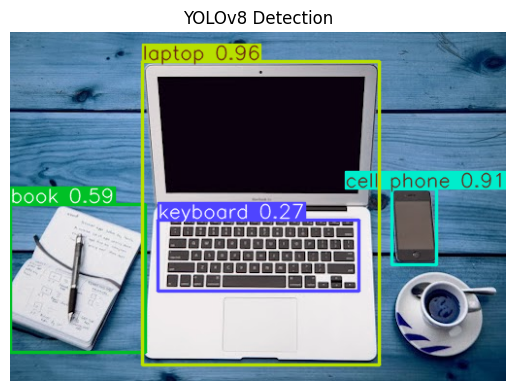

In [7]:
# Show image with detections
annotated_img = results[0].plot()
plt.imshow(annotated_img)
plt.axis('off')
plt.title('YOLOv8 Detection')
plt.show()

# # Optional: Save
# # Save the image with detections
# output_path = 'detected_output.jpg'
# cv2.imwrite(output_path, cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))
# print(f"Image saved as: {output_path}")

# # To Download the save image
# from google.colab import files
# files.download(output_path)